In [23]:
pip install python-constraint


Note: you may need to restart the kernel to use updated packages.


## Scenario 1

In [7]:
from constraint import Problem

#Define the Problem
problem = Problem()

#Variables (Positions to Fill)
roles = ["AI Engineer", "Systems Engineer", "Web Designer", "Database Admin"]

#Domains (Candidates for Each Role)
candidates = {
    "AI Engineer": ["Peter", "Juan", "Jim", "Anita", "Maria"],
    "Systems Engineer": ["Juan", "Jim", "Mary", "Bruce"],
    "Web Designer": ["Juan", "Mary", "Anita"],
    "Database Admin": ["Jim", "Jane"]
}

#Add Variables to the Problem with Relevant Domains
problem.addVariable("AI Engineer", candidates["AI Engineer"])
problem.addVariable("Systems Engineer", candidates["Systems Engineer"])
problem.addVariable("Web Designer", candidates["Web Designer"])
problem.addVariable("Database Admin", candidates["Database Admin"])

#Constraint 1: Unique Assignments (No Duplicate Candidates for Roles)
def unique_candidates(*args):
    return len(set(args)) == len(args)  #Ensure all assignments are unique

problem.addConstraint(unique_candidates, roles)

#Constraint 2: Max of Two Roles Per Candidate
def max_roles(*assignments):
    counts = {}
    for candidate in assignments:
        counts[candidate] = counts.get(candidate, 0) + 1
    return all(count <= 2 for count in counts.values())

problem.addConstraint(max_roles, roles)

#Solve the CSP
solutions = problem.getSolutions()

#Display Results
if solutions:
    print("Possible Assignments for Scenario 1:")
    for i, solution in enumerate(solutions, 1):
        print(f"\nSolution {i}:")
        for role, candidate in solution.items():
            print(f" - {role}: {candidate}")
        print("")  #Adds a blank line after each solution
else:
    print("No valid solution found!")


Possible Assignments for Scenario 1:

Solution 1:
 - Database Admin: Jane
 - Web Designer: Anita
 - Systems Engineer: Bruce
 - AI Engineer: Maria


Solution 2:
 - Database Admin: Jane
 - Web Designer: Anita
 - Systems Engineer: Bruce
 - AI Engineer: Jim


Solution 3:
 - Database Admin: Jane
 - Web Designer: Anita
 - Systems Engineer: Bruce
 - AI Engineer: Juan


Solution 4:
 - Database Admin: Jane
 - Web Designer: Anita
 - Systems Engineer: Bruce
 - AI Engineer: Peter


Solution 5:
 - Database Admin: Jane
 - Web Designer: Anita
 - Systems Engineer: Mary
 - AI Engineer: Maria


Solution 6:
 - Database Admin: Jane
 - Web Designer: Anita
 - Systems Engineer: Mary
 - AI Engineer: Jim


Solution 7:
 - Database Admin: Jane
 - Web Designer: Anita
 - Systems Engineer: Mary
 - AI Engineer: Juan


Solution 8:
 - Database Admin: Jane
 - Web Designer: Anita
 - Systems Engineer: Mary
 - AI Engineer: Peter


Solution 9:
 - Database Admin: Jane
 - Web Designer: Anita
 - Systems Engineer: Jim
 - AI En

## A* Algorithm Solution

In [3]:
import heapq

In [7]:
#Existing Data
positions = ["Database Admin", "Web Designer", "Systems Engineer", "AI Engineer"]
candidates = {
    "Jane": ["Database Admin", "Web Designer"],
    "Anita": ["Web Designer", "AI Engineer"],
    "Bruce": ["Systems Engineer"],
    "Maria": ["AI Engineer"],
    "Jim": ["AI Engineer", "Database Admin"],
    "Mary": ["Systems Engineer", "Web Designer"],
    "Juan": ["AI Engineer", "Web Designer"],
    "Peter": ["AI Engineer", "Systems Engineer"]
}

#Define A* Node
class Node:
    def __init__(self, assignment, cost, remaining_positions):
        self.assignment = assignment
        self.cost = cost
        self.remaining_positions = remaining_positions

    def __lt__(self, other):
        return self.cost < other.cost

#Heuristic Function: Counts unassigned positions (simplified example)
def heuristic(remaining_positions):
    return len(remaining_positions)

#Constraint Check: Valid assignment
def is_valid(assignment, position, candidate):
    #Max 2 roles per person
    if list(assignment.values()).count(candidate) >= 2:
        return False
    #Candidate must be qualified
    return position in candidates[candidate]

#Generate Successors
def successors(node):
    successors_list = []
    for candidate in candidates.keys():
        if node.remaining_positions:
            position = node.remaining_positions[0]
            if is_valid(node.assignment, position, candidate):
                new_assignment = node.assignment.copy()
                new_assignment[position] = candidate
                new_remaining_positions = node.remaining_positions[1:]
                new_cost = len(new_remaining_positions) + heuristic(new_remaining_positions)
                successors_list.append(Node(new_assignment, new_cost, new_remaining_positions))
    return successors_list

#A* Algorithm
def a_star_hiring(positions, candidates):
    initial_node = Node({}, 0, positions)
    frontier = []
    heapq.heappush(frontier, initial_node)
    
    while frontier:
        current_node = heapq.heappop(frontier)
        
        #Goal check
        if not current_node.remaining_positions:
            return current_node.assignment
        
        #Generate successors
        for successor in successors(current_node):
            heapq.heappush(frontier, successor)
    
    return None  #No solution

#Run the A* Algorithm
solution = a_star_hiring(positions, candidates)
print("Ideal Assignment:", solution)


Ideal Assignment: {'Database Admin': 'Jane', 'Web Designer': 'Jane', 'Systems Engineer': 'Bruce', 'AI Engineer': 'Anita'}


## Visualising Scenario 1

**Constraint Visualisation**:
- Show candidates and their skill sets.
- Illustrate domains for each role (e.g., candidates who qualify for each position).
- Visualise constraints such as "Max Roles per Person" and "One Role per Position."

**Solution Visualisation**:
- Represent the feasible solutions using tables, heatmaps, or bar charts.
- Use a bar chart to show the distribution of roles across candidates.
- Highlight the number of feasible solutions found.

### Organise Data

In [37]:
#List of all 59 solutions
solutions = [
    {'Database Admin': 'Jane', 'Web Designer': 'Anita', 'Systems Engineer': 'Bruce', 'AI Engineer': 'Maria'},
    {'Database Admin': 'Jane', 'Web Designer': 'Anita', 'Systems Engineer': 'Bruce', 'AI Engineer': 'Jim'},
    {'Database Admin': 'Jane', 'Web Designer': 'Anita', 'Systems Engineer': 'Bruce', 'AI Engineer': 'Juan'},
    {'Database Admin': 'Jane', 'Web Designer': 'Anita', 'Systems Engineer': 'Bruce', 'AI Engineer': 'Peter'},
    {'Database Admin': 'Jane', 'Web Designer': 'Anita', 'Systems Engineer': 'Mary', 'AI Engineer': 'Maria'},
    {'Database Admin': 'Jane', 'Web Designer': 'Anita', 'Systems Engineer': 'Mary', 'AI Engineer': 'Jim'},
    {'Database Admin': 'Jane', 'Web Designer': 'Anita', 'Systems Engineer': 'Mary', 'AI Engineer': 'Juan'},
    {'Database Admin': 'Jane', 'Web Designer': 'Anita', 'Systems Engineer': 'Mary', 'AI Engineer': 'Peter'},
    {'Database Admin': 'Jane', 'Web Designer': 'Anita', 'Systems Engineer': 'Jim', 'AI Engineer': 'Maria'},
    {'Database Admin': 'Jane', 'Web Designer': 'Anita', 'Systems Engineer': 'Jim', 'AI Engineer': 'Juan'},
    {'Database Admin': 'Jane', 'Web Designer': 'Anita', 'Systems Engineer': 'Jim', 'AI Engineer': 'Peter'},
    {'Database Admin': 'Jane', 'Web Designer': 'Anita', 'Systems Engineer': 'Juan', 'AI Engineer': 'Jim'},
    {'Database Admin': 'Jane', 'Web Designer': 'Anita', 'Systems Engineer': 'Juan', 'AI Engineer': 'Maria'},
    {'Database Admin': 'Jane', 'Web Designer': 'Anita', 'Systems Engineer': 'Juan', 'AI Engineer': 'Peter'},
    {'Database Admin': 'Jane', 'Web Designer': 'Mary', 'Systems Engineer': 'Bruce', 'AI Engineer': 'Anita'},
    {'Database Admin': 'Jane', 'Web Designer': 'Mary', 'Systems Engineer': 'Bruce', 'AI Engineer': 'Juan'},
    {'Database Admin': 'Jane', 'Web Designer': 'Mary', 'Systems Engineer': 'Bruce', 'AI Engineer': 'Jim'},
    {'Database Admin': 'Jane', 'Web Designer': 'Mary', 'Systems Engineer': 'Bruce', 'AI Engineer': 'Maria'},
    {'Database Admin': 'Jane', 'Web Designer': 'Mary', 'Systems Engineer': 'Bruce', 'AI Engineer': 'Peter'},
    {'Database Admin': 'Jane', 'Web Designer': 'Mary', 'Systems Engineer': 'Jim', 'AI Engineer': 'Anita'},
    {'Database Admin': 'Jane', 'Web Designer': 'Mary', 'Systems Engineer': 'Jim', 'AI Engineer': 'Juan'},
    {'Database Admin': 'Jane', 'Web Designer': 'Mary', 'Systems Engineer': 'Jim', 'AI Engineer': 'Maria'},
    {'Database Admin': 'Jane', 'Web Designer': 'Mary', 'Systems Engineer': 'Jim', 'AI Engineer': 'Peter'},
    {'Database Admin': 'Jane', 'Web Designer': 'Mary', 'Systems Engineer': 'Juan', 'AI Engineer': 'Jim'},
    {'Database Admin': 'Jane', 'Web Designer': 'Mary', 'Systems Engineer': 'Juan', 'AI Engineer': 'Anita'},
    {'Database Admin': 'Jane', 'Web Designer': 'Mary', 'Systems Engineer': 'Juan', 'AI Engineer': 'Maria'},
    {'Database Admin': 'Jane', 'Web Designer': 'Mary', 'Systems Engineer': 'Juan', 'AI Engineer': 'Peter'},
    {'Database Admin': 'Jane', 'Web Designer': 'Juan', 'Systems Engineer': 'Bruce', 'AI Engineer': 'Jim'},
    {'Database Admin': 'Jane', 'Web Designer': 'Juan', 'Systems Engineer': 'Bruce', 'AI Engineer': 'Anita'},
    {'Database Admin': 'Jane', 'Web Designer': 'Juan', 'Systems Engineer': 'Bruce', 'AI Engineer': 'Maria'},
    {'Database Admin': 'Jane', 'Web Designer': 'Juan', 'Systems Engineer': 'Bruce', 'AI Engineer': 'Peter'},
    {'Database Admin': 'Jane', 'Web Designer': 'Juan', 'Systems Engineer': 'Mary', 'AI Engineer': 'Jim'},
    {'Database Admin': 'Jane', 'Web Designer': 'Juan', 'Systems Engineer': 'Mary', 'AI Engineer': 'Anita'},
    {'Database Admin': 'Jane', 'Web Designer': 'Juan', 'Systems Engineer': 'Mary', 'AI Engineer': 'Maria'},
    {'Database Admin': 'Jane', 'Web Designer': 'Juan', 'Systems Engineer': 'Mary', 'AI Engineer': 'Peter'},
    {'Database Admin': 'Jane', 'Web Designer': 'Juan', 'Systems Engineer': 'Jim', 'AI Engineer': 'Anita'},
    {'Database Admin': 'Jane', 'Web Designer': 'Juan', 'Systems Engineer': 'Jim', 'AI Engineer': 'Maria'},
    {'Database Admin': 'Jane', 'Web Designer': 'Juan', 'Systems Engineer': 'Jim', 'AI Engineer': 'Peter'},
    {'Database Admin': 'Jim', 'Web Designer': 'Anita', 'Systems Engineer': 'Bruce', 'AI Engineer': 'Juan'},
    {'Database Admin': 'Jim', 'Web Designer': 'Anita', 'Systems Engineer': 'Bruce', 'AI Engineer': 'Maria'},
    {'Database Admin': 'Jim', 'Web Designer': 'Anita', 'Systems Engineer': 'Bruce', 'AI Engineer': 'Peter'},
    {'Database Admin': 'Jim', 'Web Designer': 'Anita', 'Systems Engineer': 'Mary', 'AI Engineer': 'Juan'},
    {'Database Admin': 'Jim', 'Web Designer': 'Anita', 'Systems Engineer': 'Mary', 'AI Engineer': 'Maria'},
    {'Database Admin': 'Jim', 'Web Designer': 'Anita', 'Systems Engineer': 'Mary', 'AI Engineer': 'Peter'},
    {'Database Admin': 'Jim', 'Web Designer': 'Anita', 'Systems Engineer': 'Juan', 'AI Engineer': 'Maria'},
    {'Database Admin': 'Jim', 'Web Designer': 'Anita', 'Systems Engineer': 'Juan', 'AI Engineer': 'Peter'},
    {'Database Admin': 'Jim', 'Web Designer': 'Mary', 'Systems Engineer': 'Bruce', 'AI Engineer': 'Anita'},
    {'Database Admin': 'Jim', 'Web Designer': 'Mary', 'Systems Engineer': 'Bruce', 'AI Engineer': 'Juan'},
    {'Database Admin': 'Jim', 'Web Designer': 'Mary', 'Systems Engineer': 'Bruce', 'AI Engineer': 'Maria'},
    {'Database Admin': 'Jim', 'Web Designer': 'Mary', 'Systems Engineer': 'Bruce', 'AI Engineer': 'Peter'},
    {'Database Admin': 'Jim', 'Web Designer': 'Mary', 'Systems Engineer': 'Juan', 'AI Engineer': 'Anita'},
    {'Database Admin': 'Jim', 'Web Designer': 'Mary', 'Systems Engineer': 'Juan', 'AI Engineer': 'Maria'},
    {'Database Admin': 'Jim', 'Web Designer': 'Mary', 'Systems Engineer': 'Juan', 'AI Engineer': 'Peter'},
    {'Database Admin': 'Jim', 'Web Designer': 'Juan', 'Systems Engineer': 'Bruce', 'AI Engineer': 'Anita'},
    {'Database Admin': 'Jim', 'Web Designer': 'Juan', 'Systems Engineer': 'Bruce', 'AI Engineer': 'Maria'},
    {'Database Admin': 'Jim', 'Web Designer': 'Juan', 'Systems Engineer': 'Bruce', 'AI Engineer': 'Peter'},
    {'Database Admin': 'Jim', 'Web Designer': 'Juan', 'Systems Engineer': 'Mary', 'AI Engineer': 'Anita'},
    {'Database Admin': 'Jim', 'Web Designer': 'Juan', 'Systems Engineer': 'Mary', 'AI Engineer': 'Maria'},
    {'Database Admin': 'Jim', 'Web Designer': 'Juan', 'Systems Engineer': 'Mary', 'AI Engineer': 'Peter'}
]

#Extract roles
roles = ['Database Admin', 'Web Designer', 'Systems Engineer', 'AI Engineer']

### Count Assignments

In [39]:
from collections import Counter

#Initialise counters for each role
role_counts = {role: Counter() for role in roles}

#Count occurrences
for solution in solutions:
    for role, individual in solution.items():
        role_counts[role][individual] += 1

#Print role counts
for role, counts in role_counts.items():
    print(f"{role}: {dict(counts)}")


Database Admin: {'Jane': 38, 'Jim': 21}
Web Designer: {'Anita': 22, 'Mary': 20, 'Juan': 17}
Systems Engineer: {'Bruce': 23, 'Mary': 14, 'Jim': 10, 'Juan': 12}
AI Engineer: {'Maria': 17, 'Jim': 7, 'Juan': 8, 'Peter': 17, 'Anita': 10}


### Candidate Skills Heatmap
Heatmap: To represent which candidates have the required skills for each position.

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

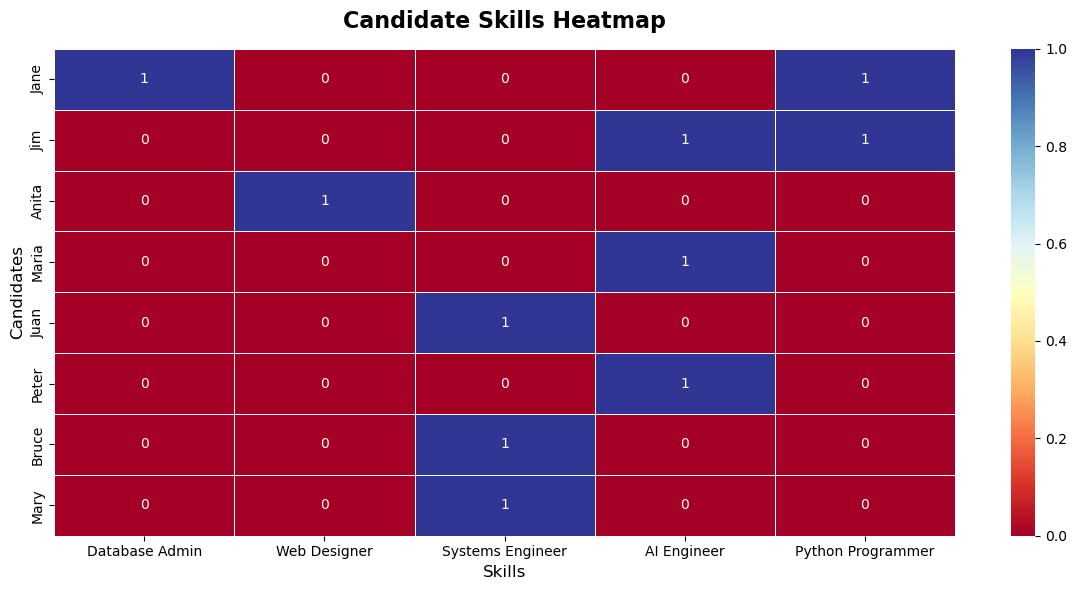

In [64]:
#Data(Candidates and their roles)
candidates = {
    "Jane": ["Database Admin", "Python Programmer"],
    "Jim": ["AI Engineer", "Python Programmer"],
    "Anita": ["Web Designer", "Frontend Developer"],
    "Maria": ["AI Engineer", "Data Scientist"],
    "Juan": ["Systems Engineer", "DevOps Specialist"],
    "Peter": ["AI Engineer", "Backend Developer"],
    "Bruce": ["Systems Engineer", "Network Specialist"],
    "Mary": ["Systems Engineer", "Project Manager"]
}

#Define the roles that will be displayed in the heatmap
roles = ["Database Admin", "Web Designer", "Systems Engineer", "AI Engineer", "Python Programmer"]

#To create a binary matrix of skills for the heatmap
skills_matrix = pd.DataFrame([
    {role: int(role in skills) for role in roles} for skills in candidates.values()
], index=candidates.keys())

#Plot the heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(skills_matrix, annot=True, cmap="RdYlBu", cbar=True, linewidths=0.5)
plt.title("Candidate Skills Heatmap", fontsize=16, fontweight="bold", pad=15)
plt.xlabel("Skills", fontsize=12)
plt.ylabel("Candidates", fontsize=12)
plt.xticks(rotation=0, fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

###  Domain Representation for Each Role
Bar chart: can display the domains (qualified candidates) for each position.

In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

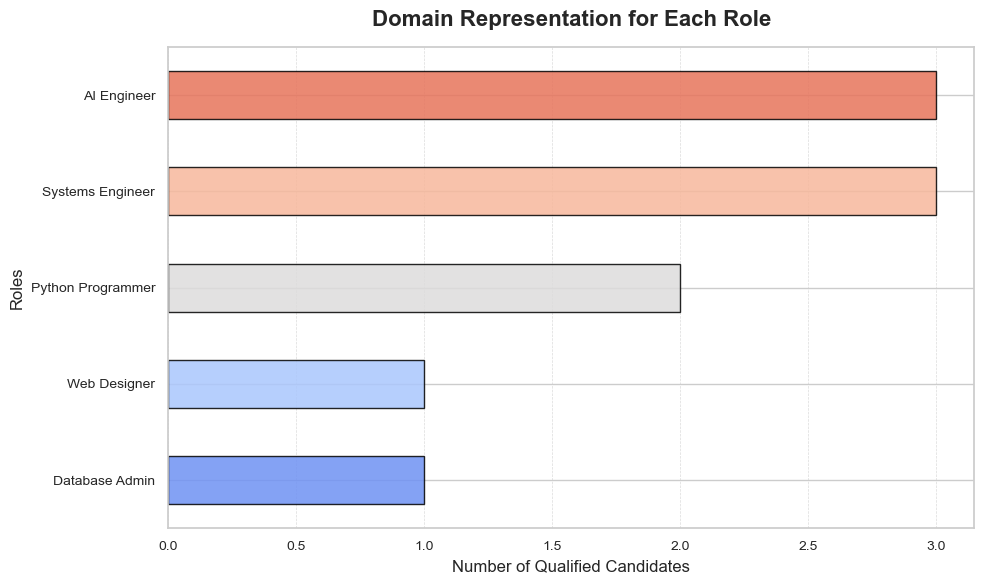

In [34]:
#Data(Candidates and their skills)
candidates = {
    "Jane": ["Database Admin", "Python Programmer"],
    "Jim": ["AI Engineer", "Python Programmer"],
    "Anita": ["Web Designer", "Frontend Developer"],
    "Maria": ["AI Engineer", "Data Scientist"],
    "Juan": ["Systems Engineer", "DevOps Specialist"],
    "Peter": ["AI Engineer", "Backend Developer"],
    "Bruce": ["Systems Engineer", "Network Specialist"],
    "Mary": ["Systems Engineer", "Project Manager"]
}

#To create a binary matrix of skills
roles = ["Database Admin", "Web Designer", "Systems Engineer", "AI Engineer", "Python Programmer"]
skills_matrix = pd.DataFrame([
    {role: int(role in skills) for role in roles} for skills in candidates.values()
], index=candidates.keys())

#To count how many candidates are qualified for each role
role_counts = skills_matrix.sum(axis=0)

#Style and color palette for the chart
sns.set_theme(style="whitegrid")
color_palette = sns.color_palette("coolwarm", len(role_counts))

#Plot the bar chart
plt.figure(figsize=(10, 6))
role_counts.sort_values().plot(
    kind="barh",  #Horizontal bar chart for better readability
    color=color_palette,
    alpha=0.85,
    edgecolor="black",
    linewidth=1
)

#Add titles and labels with consistent styling
plt.title("Domain Representation for Each Role", fontsize=16, fontweight="bold", pad=15)
plt.xlabel("Number of Qualified Candidates", fontsize=12)
plt.ylabel("Roles", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

#Gridlines for clarity
plt.grid(axis="x", linestyle="--", linewidth=0.5, alpha=0.7)

#Tighten the layout and show the chart
plt.tight_layout()
plt.show()

### Role Distribution and Requirements
Stacked Bar Chart: To show the required roles (Python Programmers, AI Engineers, Web Designer, Database Admin, Systems Engineer) versus the employees' skills distribution. This gives stakeholders a clear understanding of how individual abilities align with job roles.

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

<Figure size 1000x600 with 0 Axes>

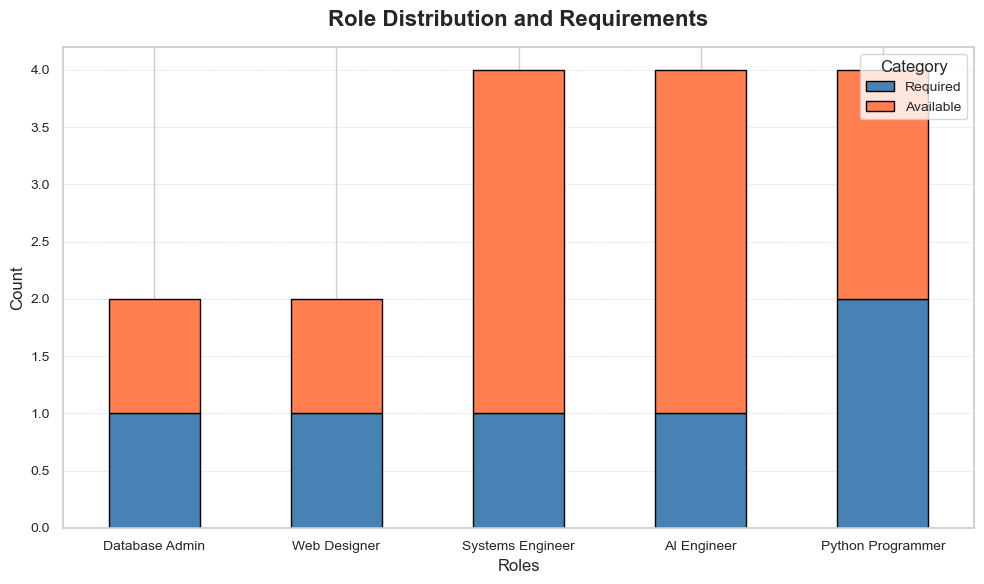

In [51]:
#Create a dataset for required roles and available skills
required_roles = {
    "Database Admin": 1,
    "Web Designer": 1,
    "Systems Engineer": 1,
    "AI Engineer": 1,
    "Python Programmer": 2
}

#Calculate the available roles from the skills matrix
available_roles = skills_matrix.sum(axis=0)

#Combine the data into a DataFrame for visualisation
role_distribution = pd.DataFrame({
    "Required": pd.Series(required_roles),
    "Available": available_roles
})

#Plot the stacked bar chart with improved styling
plt.figure(figsize=(10, 6))

#Customize colors for better readability
role_distribution.plot(
    kind="bar",
    stacked=True,
    figsize=(10, 6),
    color=["#4682B4", "#FF7F50"],  #Steel blue and coral
    edgecolor="black",
    linewidth=1
)

#Add titles, labels, and legends with enhanced styling
plt.title("Role Distribution and Requirements", fontsize=16, fontweight="bold", pad=15)
plt.xlabel("Roles", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(rotation=0, fontsize=10)
plt.yticks(fontsize=10)
plt.legend(title="Category", fontsize=10, title_fontsize=12, loc="upper right")

#Add gridlines for visual clarity
plt.grid(axis="y", linestyle="--", linewidth=0.5, alpha=0.7)

#Optimise the layout
plt.tight_layout()

#Display the chart
plt.show()


### Role Allocation Summary (Proportions per Solution)
Pie Chart: Break down the roles fulfilled by individuals in each solution. For example, in Solution 1, who fulfills the AI Engineer, Systems Engineer, etc.

In [55]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

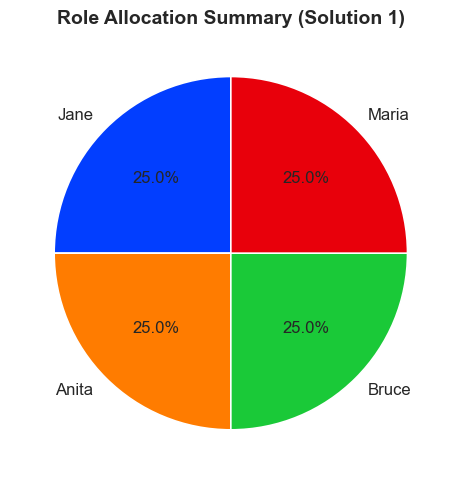

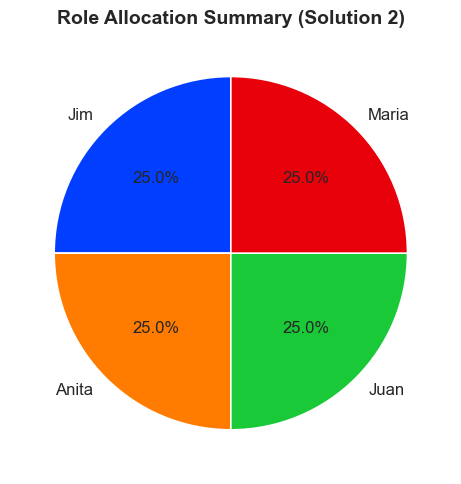

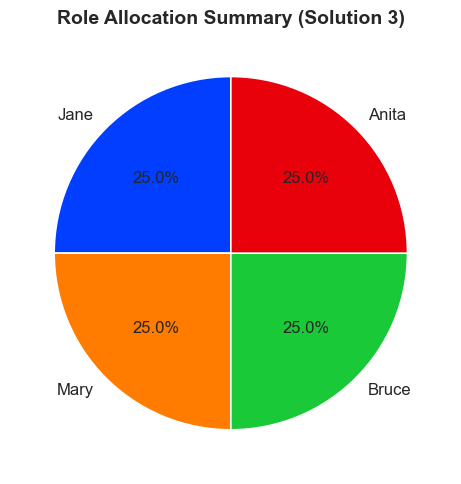

In [59]:
#Three different selected solutions out of 59
solutions = [
    {'Database Admin': 'Jane', 'Web Designer': 'Anita', 'Systems Engineer': 'Bruce', 'AI Engineer': 'Maria'},
    {'Database Admin': 'Jim', 'Web Designer': 'Anita', 'Systems Engineer': 'Juan', 'AI Engineer': 'Maria'},
    {'Database Admin': 'Jane', 'Web Designer': 'Mary', 'Systems Engineer': 'Bruce', 'AI Engineer': 'Anita'}
]

#Roles(Python programmer not included in scenario 1)
roles = ['Database Admin', 'Web Designer', 'Systems Engineer', 'AI Engineer']

#Color palette
custom_colors = sns.color_palette("bright", len(roles))

#Plot each solution as a separate pie chart
for i, solution in enumerate(solutions, start=1):
    #Count how many roles are assigned to each individual
    allocation_summary = pd.Series(solution).value_counts()
    
     #Pie chart
    plt.figure(figsize=(5, 5))
    allocation_summary.plot.pie(
        autopct="%1.1f%%",
        startangle=90,
        colors=custom_colors,
        wedgeprops={'edgecolor': 'white', 'linewidth': 1.2},
        textprops={'fontsize': 12} 
    )
    plt.title(f"Role Allocation Summary (Solution {i})", fontsize=14, weight='bold')
    plt.ylabel("")  #Remove the default y-label
    plt.tight_layout()
    plt.show()

## Interactive Bar Chart Visualisation
- allows users to explore alternate constraint scenarios.

In [17]:
import pandas as pd
import plotly.express as px

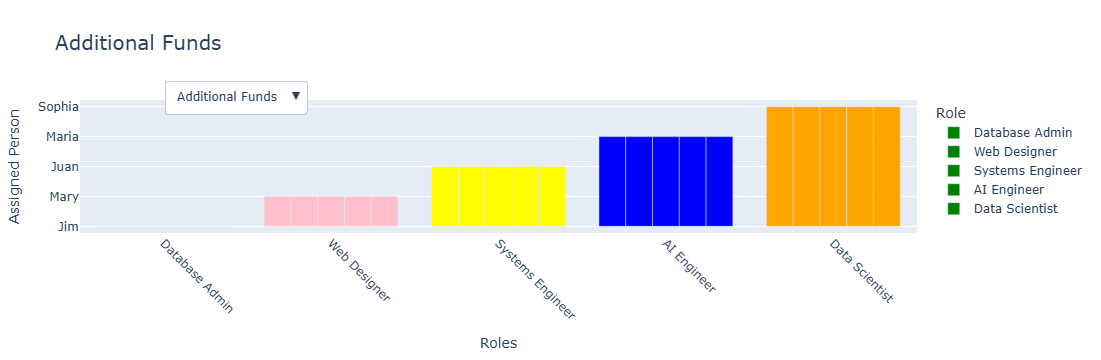

In [4]:
#Define the data for constraint scenarios
data = [
    #Scenario 1: Limited Funds
    {'Scenario': 'Limited Funds', 'Role': 'Database Admin', 'Person': 'Jane'},
    {'Scenario': 'Limited Funds', 'Role': 'Web Designer', 'Person': 'Anita'},
    {'Scenario': 'Limited Funds', 'Role': 'Systems Engineer', 'Person': 'Bruce'},
    {'Scenario': 'Limited Funds', 'Role': 'AI Engineer', 'Person': 'Maria'},

    #Scenario 2: Additional Funds
    {'Scenario': 'Additional Funds', 'Role': 'Database Admin', 'Person': 'Jim'},
    {'Scenario': 'Additional Funds', 'Role': 'Web Designer', 'Person': 'Mary'},
    {'Scenario': 'Additional Funds', 'Role': 'Systems Engineer', 'Person': 'Juan'},
    {'Scenario': 'Additional Funds', 'Role': 'AI Engineer', 'Person': 'Maria'},
    {'Scenario': 'Additional Funds', 'Role': 'Data Scientist', 'Person': 'Sophia'},

    #Scenario 3: Optimized Hiring
    {'Scenario': 'Optimized Hiring', 'Role': 'Database Admin', 'Person': 'Jane'},
    {'Scenario': 'Optimized Hiring', 'Role': 'Web Designer', 'Person': 'Juan'},
    {'Scenario': 'Optimized Hiring', 'Role': 'Systems Engineer', 'Person': 'Mary'},
    {'Scenario': 'Optimized Hiring', 'Role': 'AI Engineer', 'Person': 'Peter'},
    {'Scenario': 'Optimized Hiring', 'Role': 'Data Scientist', 'Person': 'Sophia'}
]

#Convert data to a DataFrame
df = pd.DataFrame(data)

#Define a custom color map for roles
role_color_map = {
    'Database Admin': 'green',
    'Web Designer': 'pink',
    'Systems Engineer': 'yellow',
    'AI Engineer': 'blue',
    'Data Scientist': 'orange'
}

#Function to create the interactive bar chart based on the selected scenario
def create_bar_chart(selected_scenario='All Scenarios'):
    if selected_scenario == 'All Scenarios':
        filtered_df = df
        title = "All Scenarios"
    else:
        filtered_df = df[df['Scenario'] == selected_scenario]
        title = selected_scenario

    #Create the bar chart
    fig = px.bar(
        filtered_df,
        x='Role',
        y='Person',
        color='Role',
        barmode='group',
        color_discrete_map=role_color_map,
        title=title,
        labels={'Role': 'Job Roles', 'Person': 'Assigned Person'}
    )

    #Update chart layout
    fig.update_layout(
        title=dict(text=f"Interactive Bar Chart: {title}", font=dict(size=20)),
        xaxis=dict(title="Roles", tickangle=45),  #Diagonal labels for better visibility
        yaxis_title="Assigned Person",
        legend_title="Role",
        template="plotly",
        showlegend=True,
        updatemenus=[
            dict(
                buttons=[
                    dict(
                        label="All Scenarios",
                        method="update",
                        args=[
                            {"x": [df['Role']],
                             "y": [df['Person']],
                             "marker.color": [df['Role'].map(role_color_map)]},
                            {"title": "All Scenarios"}
                        ]
                    ),
                    dict(
                        label="Limited Funds",
                        method="update",
                        args=[
                            {"x": [df[df['Scenario'] == 'Limited Funds']['Role']],
                             "y": [df[df['Scenario'] == 'Limited Funds']['Person']],
                             "marker.color": [df[df['Scenario'] == 'Limited Funds']['Role'].map(role_color_map)]},
                            {"title": "Limited Funds"}
                        ]
                    ),
                    dict(
                        label="Additional Funds",
                        method="update",
                        args=[
                            {"x": [df[df['Scenario'] == 'Additional Funds']['Role']],
                             "y": [df[df['Scenario'] == 'Additional Funds']['Person']],
                             "marker.color": [df[df['Scenario'] == 'Additional Funds']['Role'].map(role_color_map)]},
                            {"title": "Additional Funds"}
                        ]
                    ),
                    dict(
                        label="Optimized Hiring",
                        method="update",
                        args=[
                            {"x": [df[df['Scenario'] == 'Optimized Hiring']['Role']],
                             "y": [df[df['Scenario'] == 'Optimized Hiring']['Person']],
                             "marker.color": [df[df['Scenario'] == 'Optimized Hiring']['Role'].map(role_color_map)]},
                            {"title": "Optimized Hiring"}
                        ]
                    ),
                ],
                direction="down",
                showactive=True,
                x=0.1,
                xanchor="left",
                y=1.15,
                yanchor="top"
            )
        ],
        #Highlighted changes: Disable clickable legends
        legend_itemclick=False,  #This disables single-click interactivity on legends
        legend_itemdoubleclick=False  #This disables double-click interactivity on legends
    )
    return fig

#Create and display the initial chart for all scenarios
fig = create_bar_chart('All Scenarios')
fig.show()


## GUI for alternate constraint scenarios

In [9]:
import tkinter as tk
from tkinter import ttk, messagebox
import pandas as pd
import plotly.graph_objects as go
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
from plotly.subplots import make_subplots

In [ ]:
#Data for constraint scenarios
data = [
    {'Scenario': 'Limited Funds', 'Role': 'Database Admin', 'Assigned': 1},
    {'Scenario': 'Limited Funds', 'Role': 'Web Designer', 'Assigned': 1},
    {'Scenario': 'Limited Funds', 'Role': 'Systems Engineer', 'Assigned': 1},
    {'Scenario': 'Limited Funds', 'Role': 'AI Engineer', 'Assigned': 1},

    {'Scenario': 'Additional Funds', 'Role': 'Database Admin', 'Assigned': 1},
    {'Scenario': 'Additional Funds', 'Role': 'Web Designer', 'Assigned': 1},
    {'Scenario': 'Additional Funds', 'Role': 'Systems Engineer', 'Assigned': 1},
    {'Scenario': 'Additional Funds', 'Role': 'AI Engineer', 'Assigned': 1},
    {'Scenario': 'Additional Funds', 'Role': 'Data Scientist', 'Assigned': 1},

    {'Scenario': 'Optimized Hiring', 'Role': 'Database Admin', 'Assigned': 1},
    {'Scenario': 'Optimized Hiring', 'Role': 'Web Designer', 'Assigned': 1},
    {'Scenario': 'Optimized Hiring', 'Role': 'Systems Engineer', 'Assigned': 1},
    {'Scenario': 'Optimized Hiring', 'Role': 'AI Engineer', 'Assigned': 1},
    {'Scenario': 'Optimized Hiring', 'Role': 'Data Scientist', 'Assigned': 1}
]

#Convert data to DataFrame
df = pd.DataFrame(data)

#Function to create the stacked area chart
def create_stacked_area_chart(selected_scenario='All Scenarios'):
    if selected_scenario == 'All Scenarios':
        filtered_df = df
    else:
        filtered_df = df[df['Scenario'] == selected_scenario]

    pivot_df = filtered_df.pivot_table(index='Role', columns='Scenario', values='Assigned', fill_value=0)

    #Create stacked area chart
    fig = make_subplots(specs=[[{"secondary_y": False}]])
    for scenario in pivot_df.columns:
        fig.add_scatter(
            x=pivot_df.index,
            y=pivot_df[scenario],
            mode='lines',
            stackgroup='one',  # Enables stacking
            name=scenario
        )

    fig.update_layout(
        title=f"Stacked Area Chart: {selected_scenario}",
        xaxis_title="Job Roles",
        yaxis_title="Number of Assignments",
        legend_title="Scenarios",
        template="plotly",
    )

    return fig

#Function to update the chart based on user selection
def update_chart(canvas, frame):
    selected_scenario = scenario_var.get()
    fig = create_stacked_area_chart(selected_scenario)
    canvas.draw_idle()
    plot_figure(fig, canvas, frame)

#Function to add new data
def add_new_data():
    scenario = scenario_entry.get()
    role = role_entry.get()
    assigned = assigned_entry.get()

    if not scenario or not role or not assigned.isdigit():
        messagebox.showerror("Input Error", "Please enter valid data!")
        return

    new_data = {'Scenario': scenario, 'Role': role, 'Assigned': int(assigned)}
    global df
    df = df.append(new_data, ignore_index=True)
    messagebox.showinfo("Success", "Data added successfully!")

#Function to reset the data
def reset_data():
    global df
    df = pd.DataFrame(data)  # Reset to initial data
    messagebox.showinfo("Reset", "Data has been reset to default!")

#Function to embed Plotly chart into Tkinter
def plot_figure(fig, canvas, frame):
    html_str = fig.to_html(full_html=False)
    html_widget = tk.Text(frame, height=25, width=100)
    html_widget.insert("1.0", html_str)
    html_widget.pack(side=tk.TOP, fill=tk.BOTH, expand=True)

#Tkinter GUI
root = tk.Tk()
root.title("Explore Constraint Scenarios")
root.geometry("900x600")

#Main frame for the chart
chart_frame = tk.Frame(root)
chart_frame.pack(side=tk.TOP, fill=tk.BOTH, expand=True)

#Bottom frame for controls
control_frame = tk.Frame(root)
control_frame.pack(side=tk.BOTTOM, fill=tk.X, expand=True)

#Dropdown for scenario selection
scenario_var = tk.StringVar(value="All Scenarios")
scenario_label = tk.Label(control_frame, text="Select Scenario:", font=("Arial", 12))
scenario_label.grid(row=0, column=0, padx=10, pady=10)

scenario_dropdown = ttk.Combobox(
    control_frame, textvariable=scenario_var, state="readonly",
    values=["All Scenarios", "Limited Funds", "Additional Funds", "Optimized Hiring"]
)
scenario_dropdown.grid(row=0, column=1, padx=10, pady=10)

#Button to update the chart
update_button = tk.Button(control_frame, text="Generate Chart", command=lambda: update_chart(canvas, chart_frame), font=("Arial", 12))
update_button.grid(row=0, column=2, padx=10, pady=10)

#Entry boxes for adding new data
scenario_entry = tk.Entry(control_frame, width=20)
role_entry = tk.Entry(control_frame, width=20)
assigned_entry = tk.Entry(control_frame, width=5)

scenario_label = tk.Label(control_frame, text="Scenario:")
role_label = tk.Label(control_frame, text="Role:")
assigned_label = tk.Label(control_frame, text="Assigned:")

scenario_label.grid(row=1, column=0)
role_label.grid(row=1, column=1)
assigned_label.grid(row=1, column=2)

scenario_entry.grid(row=2, column=0)
role_entry.grid(row=2, column=1)
assigned_entry.grid(row=2, column=2)

#Add and Reset buttons
add_button = tk.Button(control_frame, text="Add Data", command=add_new_data, font=("Arial", 12))
reset_button = tk.Button(control_frame, text="Reset Data", command=reset_data, font=("Arial", 12))

add_button.grid(row=2, column=3, padx=10, pady=10)
reset_button.grid(row=2, column=4, padx=10, pady=10)

#Initial chart creation
fig = create_stacked_area_chart('All Scenarios')
canvas = FigureCanvasTkAgg(fig, master=chart_frame)
canvas.draw()
plot_figure(fig, canvas, chart_frame)

#Run the GUI
root.mainloop()

## Scenario 2

In [27]:
from constraint import Problem

#Step 1: Define the CSP problem
problem = Problem()

#Step 2: Define variables (roles to be filled) and their domains (eligible candidates)
roles = {
    "Python Programmer": ["Peter", "Bruce", "Jane"],
    "AI Engineer": ["Peter", "Juan", "Jim", "Anita", "Maria"],
    "Web Designer": ["Juan", "Mary", "Anita"],
    "Database Admin": ["Jim", "Jane"],
    "Systems Engineer": ["Juan", "Jim", "Mary", "Bruce"],
    "Security Employee (Optional)": ["Maria", "Mary"]
}

#Number of each role needed
role_requirements = {
    "Python Programmer": 3,
    "AI Engineer": 3,
    "Web Designer": 1,
    "Database Admin": 1,
    "Systems Engineer": 1,
    "Security Employee (Optional)": 0  # Optional role
}

#Add variables and their domains to the problem
for role, candidates in roles.items():
    problem.addVariables([f"{role} {i+1}" for i in range(role_requirements[role])], candidates)

#Step 3: Define constraints
#Allow candidates to take at most two roles
def max_two_roles(*assignments):
    from collections import Counter
    counts = Counter(assignments)
    return all(count <= 2 for count in counts.values())

problem.addConstraint(max_two_roles, problem._variables)

#Prioritise filling all required roles
#No additional code needed since constraints naturally enforce role requirements

#Step 4: Solve the problem
solutions = problem.getSolutions()

#Step 5: Display the results with improved formatting
max_solutions_to_display = 50

if solutions:
    print(f"Found {len(solutions)} solution(s). Displaying the first {min(max_solutions_to_display, len(solutions))} solutions:\n")
    
    for i, solution in enumerate(solutions[:max_solutions_to_display]):
        print(f"Solution {i + 1}:")
        print("-" * 40)  #Divider line for better readability

        # Loop through the roles and print the candidate for each role
        for role, candidate in solution.items():
            print(f"{role: <25}: {candidate}")
        
        print("\n" + "=" * 40 + "\n")  #Divider after each solution for clarity

else:
    print("No solution found.")

Found 32247 solution(s). Displaying the first 50 solutions:

Solution 1:
----------------------------------------
Database Admin 1         : Jane
Python Programmer 1      : Jane
Python Programmer 2      : Bruce
Python Programmer 3      : Bruce
Web Designer 1           : Anita
Systems Engineer 1       : Mary
AI Engineer 1            : Maria
AI Engineer 2            : Maria
AI Engineer 3            : Anita


Solution 2:
----------------------------------------
Database Admin 1         : Jane
Python Programmer 1      : Jane
Python Programmer 2      : Bruce
Python Programmer 3      : Bruce
Web Designer 1           : Anita
Systems Engineer 1       : Mary
AI Engineer 1            : Maria
AI Engineer 2            : Maria
AI Engineer 3            : Jim


Solution 3:
----------------------------------------
Database Admin 1         : Jane
Python Programmer 1      : Jane
Python Programmer 2      : Bruce
Python Programmer 3      : Bruce
Web Designer 1           : Anita
Systems Engineer 1       : 

## A* Algorithm

In [1]:
import heapq

In [3]:
#Updated Data for Scenario 2
positions = [
    "Python Programmer", "Python Programmer", "Python Programmer",
    "AI Engineer", "AI Engineer", "AI Engineer",
    "Web Designer", "Database Admin", "Systems Engineer",
    "Security Employee"  #Optional role
]
candidates = {
    "Peter": ["Python Programmer", "AI Engineer"],
    "Juan": ["Web Designer", "Systems Engineer", "AI Engineer"],
    "Jim": ["AI Engineer", "Database Admin", "Systems Engineer"],
    "Jane": ["Python Programmer", "Database Admin"],
    "Mary": ["Web Designer", "Security Employee", "Systems Engineer"],
    "Bruce": ["Systems Engineer", "Python Programmer"],
    "Anita": ["Web Designer", "AI Engineer"],
    "Maria": ["Multimedia", "AI Engineer", "Security Employee"]
}

#Define A* Node
class Node:
    def __init__(self, assignment, cost, remaining_positions):
        self.assignment = assignment
        self.cost = cost
        self.remaining_positions = remaining_positions

    def __lt__(self, other):
        return self.cost < other.cost

#Heuristic Function: Counts unassigned positions
def heuristic(remaining_positions):
    return len(remaining_positions)

#Constraint Check: Valid assignment
def is_valid(assignment, position, candidate):
    #Maximum 2 roles per person
    if list(assignment.values()).count(candidate) >= 2:
        return False
    #Candidate must be qualified for the role
    return position in candidates[candidate]

#Generate Successors
def successors(node):
    successors_list = []
    for candidate in candidates.keys():
        if node.remaining_positions:
            position = node.remaining_positions[0]
            if is_valid(node.assignment, position, candidate):
                new_assignment = node.assignment.copy()
                new_assignment[f"{position} ({len(node.assignment) + 1})"] = candidate
                new_remaining_positions = node.remaining_positions[1:]
                new_cost = len(new_remaining_positions) + heuristic(new_remaining_positions)
                successors_list.append(Node(new_assignment, new_cost, new_remaining_positions))
    return successors_list

#A* Algorithm
def a_star_hiring(positions, candidates):
    initial_node = Node({}, 0, positions)
    frontier = []
    heapq.heappush(frontier, initial_node)
    
    while frontier:
        current_node = heapq.heappop(frontier)
        
        #Goal Check: All positions assigned
        if not current_node.remaining_positions:
            return current_node.assignment
        
        #Generate Successors
        for successor in successors(current_node):
            heapq.heappush(frontier, successor)
    
    return None  #No solution

#Run the A* Algorithm for Scenario 2
solution = a_star_hiring(positions, candidates)
print("Ideal Assignment:")
for role, person in solution.items():
    print(f"{role}: {person}")

Ideal Assignment:
Python Programmer (1): Peter
Python Programmer (2): Peter
Python Programmer (3): Jane
AI Engineer (4): Juan
AI Engineer (5): Juan
AI Engineer (6): Jim
Web Designer (7): Mary
Database Admin (8): Jim
Systems Engineer (9): Mary
Security Employee (10): Maria


## Visualising Scenario 2

### Constraint Visualisation:
- **Candidate Skill Sets**: Display which candidates possess the necessary skills for each role.
- **Domains for Each Role**: Show which candidates qualify for each position.
- **Constraints**:
    - **Max Roles per Person**: Ensure each candidate has a maximum of one role.
    - **One Role per Position**: Each role can only be assigned to one candidate.


### Solution Visualisation:
- **Feasible Solutions**: Use heatmaps or bar charts to show candidate-role assignments.
- **Highlight Feasible Solutions**: Represent the number of valid assignments that meet all constraints.


In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [36]:
#Define the candidates and their abilities for Scenario 2
candidates = {
    "Peter": ["Python Programmer", "AI Engineer"],
    "Juan": ["Web Designer", "Systems Engineer", "AI Engineer"],
    "Jim": ["AI Engineer", "Database Admin", "Systems Engineer"],
    "Jane": ["Python Programmer", "Database Admin"],
    "Mary": ["Web Designer", "Security Employee", "Systems Engineer"],
    "Bruce": ["Systems Engineer", "Python Programmer"],
    "Anita": ["Web Designer", "AI Engineer"],
    "Maria": ["Multimedia", "AI Engineer", "Security Employee"]
}

#Define the roles that will be displayed in the heatmap
roles = ["Python Programmer", "AI Engineer", "Web Designer", "Database Admin", "Systems Engineer", "Security Employee (Optional)"]

##  Heatmap to Show Candidate-Qualification Matching
This heatmap will show which candidates are qualified for each of the roles based on Scenario 2. The axes will list candidates on the vertical axis and roles on the horizontal axis. The cells will have a value of 1 (qualified) or 0 (not qualified), and the color intensity will reflect this.

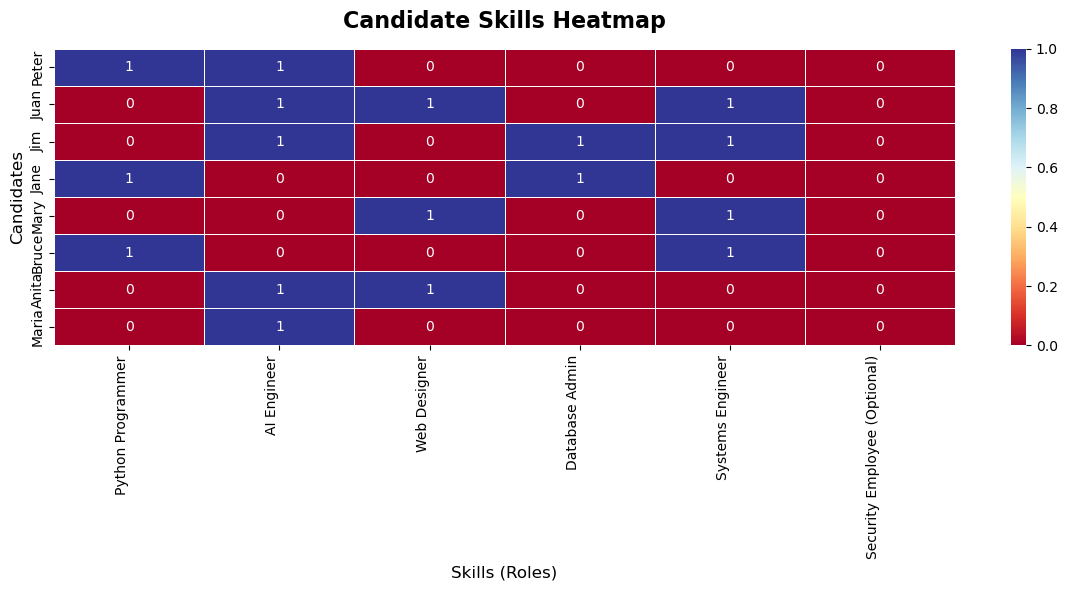

In [39]:
#Create a binary matrix of skills for the heatmap
skills_matrix = pd.DataFrame([
    {role: int(role in skills) for role in roles} for skills in candidates.values()
], index=candidates.keys())

#Plot the heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(skills_matrix, annot=True, cmap="RdYlBu", cbar=True, linewidths=0.5)
plt.title("Candidate Skills Heatmap", fontsize=16, fontweight="bold", pad=15)
plt.xlabel("Skills (Roles)", fontsize=12)
plt.ylabel("Candidates", fontsize=12)
plt.xticks(ha="right", fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

## Bar Chart: Number of Candidates Qualifying for Each Role
This chart will display how many candidates are qualified for each role.

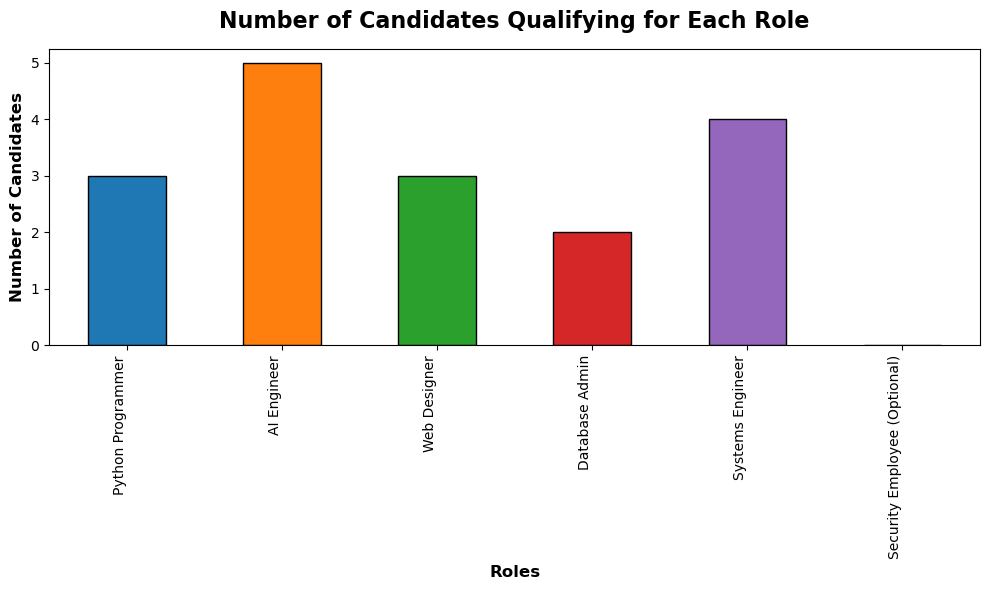

In [50]:
# Bar chart to show the number of candidates qualifying for each role with distinct colors
role_qualifications = skills_matrix.sum(axis=0)

plt.figure(figsize=(10, 6))

#Define distinct color palette for better contrast
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b']

#Use the custom colors, ensuring it matches the number of roles
role_qualifications.plot(kind='bar', color=colors[:len(role_qualifications)], edgecolor='black')

#Add title and labels with better font styles
plt.title("Number of Candidates Qualifying for Each Role", fontsize=16, fontweight="bold", pad=15)
plt.xlabel("Roles", fontsize=12, fontweight="bold")
plt.ylabel("Number of Candidates", fontsize=12, fontweight="bold")

#Customize tick labels for readability
plt.xticks(ha="right", fontsize=10)
plt.yticks(fontsize=10)

#Tight layout for better spacing
plt.tight_layout()

#Show the plot
plt.show()


## Heatmap: Feasible Role Assignments
This heatmap will display feasible assignments based on the constraints (e.g., at most two roles per person, and role requirements).

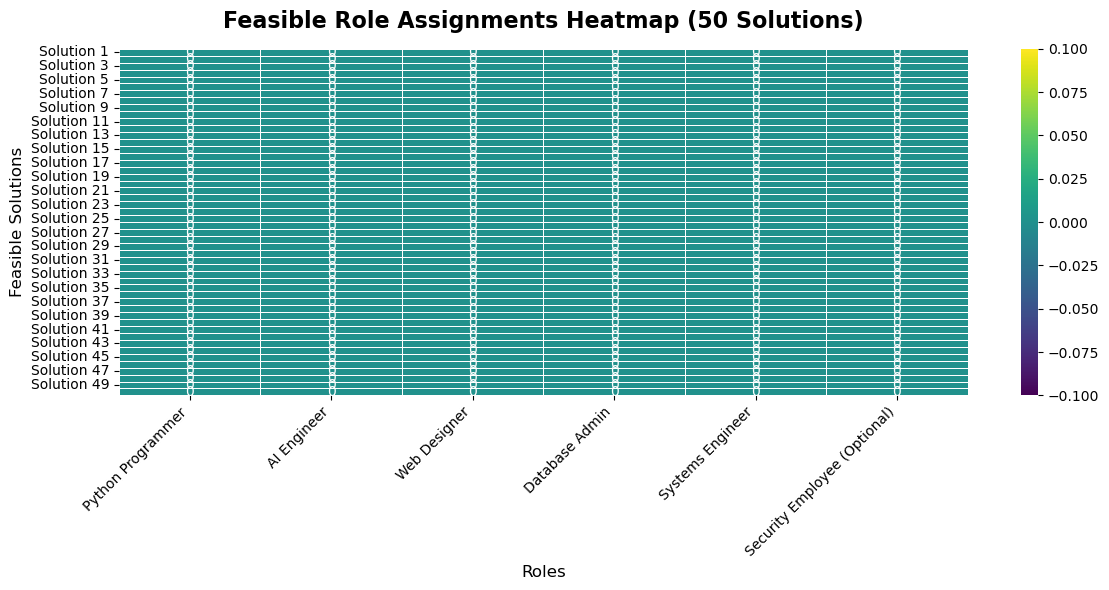

In [11]:
#Select the first 50 solutions
sampled_solutions = feasible_assignments[:50]

#Create a binary matrix for the sampled solutions
feasible_matrix = pd.DataFrame([
    {role: int(role in assignment.values()) for role in roles}
    for assignment in sampled_solutions
], index=[f"Solution {i+1}" for i in range(len(sampled_solutions))])

#Plot the heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(feasible_matrix, annot=True, cmap="viridis", cbar=True, linewidths=0.5)
plt.title("Feasible Role Assignments Heatmap (50 Solutions)", fontsize=16, fontweight="bold", pad=15)
plt.xlabel("Roles", fontsize=12)
plt.ylabel("Feasible Solutions", fontsize=12)
plt.xticks(rotation=45, ha="right", fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

## Bar Chart for Displaying the Final Assignment of Candidates to Roles
This bar chart will show how many roles are assigned to each candidate in the 50 feasible solutions.

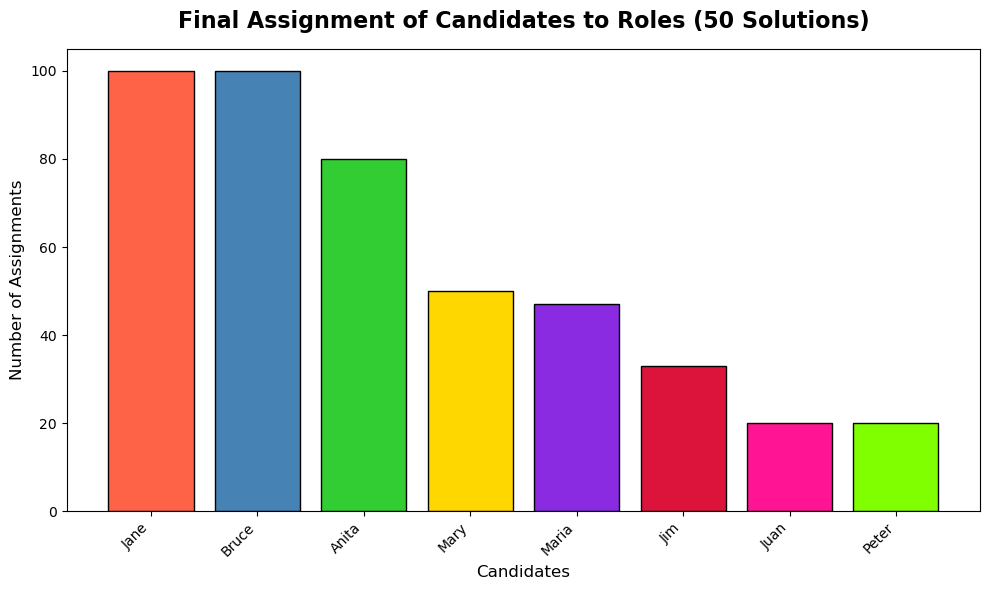

In [23]:
#Limit the solutions to 50
limited_solutions = feasible_assignments[:50]

#Create a final assignment for each candidate
final_assignment = {}
for solution in limited_solutions:
    for role, candidate in solution.items():
        final_assignment[candidate] = final_assignment.get(candidate, 0) + 1

#Define a color palette with distinct colors
colors = ['#FF6347', '#4682B4', '#32CD32', '#FFD700', '#8A2BE2', '#DC143C', 
          '#FF1493', '#7FFF00', '#D2691E', '#FF4500', '#2E8B57', '#A52A2A']

#If there are more than 12 candidates, randomly cycle through the colors
if len(final_assignment) > len(colors):
    colors = [random.choice(colors) for _ in range(len(final_assignment))]

#Plot the bar chart with custom colors
plt.figure(figsize=(10, 6))
plt.bar(final_assignment.keys(), final_assignment.values(), color=colors, edgecolor='black')

#Set the title and labels
plt.title("Final Assignment of Candidates to Roles (50 Solutions)", fontsize=16, fontweight="bold", pad=15)
plt.xlabel("Candidates", fontsize=12)
plt.ylabel("Number of Assignments", fontsize=12)

#Rotate the x-ticks and adjust font size
plt.xticks(rotation=45, ha="right", fontsize=10)
plt.yticks(fontsize=10)

#Adjust layout for tightness
plt.tight_layout()

#Display the chart
plt.show()